# SalishSeaCast Domain + Ariane CS plot

In [67]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, geo_tools

# import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

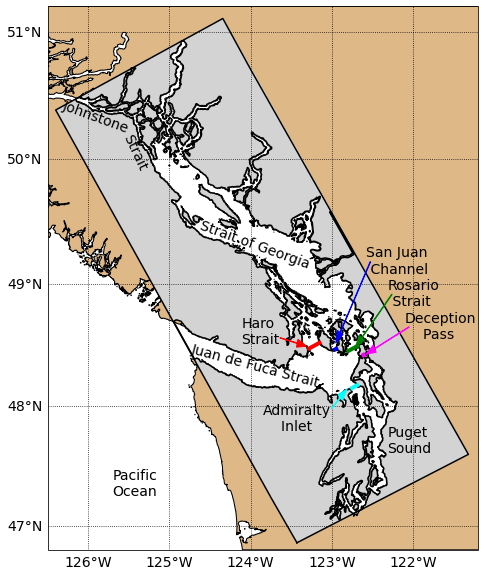

In [91]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_201702.nc', mask_and_scale=False)
mask = xr.open_dataset('/ocean/rbeutel/MEOPAR/grid/mesh_mask201702.nc')

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

# Overlay domain landmask and coastline
ax.contourf(grid.nav_lon, grid.nav_lat,mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray',transform=crs.PlateCarree(), zorder =2)
ax.contour(grid.nav_lon, grid.nav_lat,mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k',transform=crs.PlateCarree(), zorder=2)

# Draw box around domain
lons, lats = [], []
corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Add cross-sections
a = [grid.nav_lon[204,255],grid.nav_lon[204,267],grid.nav_lat[204,255],grid.nav_lat[204,267]]
d = [grid.nav_lon[246,309],grid.nav_lon[247,309],grid.nav_lat[246,309],grid.nav_lat[247,309]]
r = [grid.nav_lon[266,286],grid.nav_lon[266,307],grid.nav_lat[266,286],grid.nav_lat[266,307]]
s = [grid.nav_lon[280,264],grid.nav_lon[280,266],grid.nav_lat[280,264],grid.nav_lat[280,266]]
h = [grid.nav_lon[304,218],grid.nav_lon[304,242],grid.nav_lat[304,218],grid.nav_lat[304,242]]
ax.plot([a[0],a[1]],[a[2],a[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='cyan')
ax.plot([d[0],d[1]],[d[2],d[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='magenta')
ax.plot([r[0],r[1]],[r[2],r[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='g')
ax.plot([s[0],s[1]],[s[2],s[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='b')
ax.plot([h[0],h[1]],[h[2],h[3]],zorder=11,transform=crs.PlateCarree(),lw=4,c='r')

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', transform=ax.transAxes, rotation=-15)
ax.text(0.35, 0.52, 'Strait of Georgia', transform=ax.transAxes, rotation=-20)
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.70, 'Strait', transform=ax.transAxes, rotation=-65)
ax.text(0.45, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.50, 0.22, 'Admiralty\n    Inlet', transform=ax.transAxes)
ax.text(0.79, 0.45, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.83, 0.39, 'Deception\n    Pass', transform=ax.transAxes)
ax.text(0.74, 0.51, 'San Juan\n Channel', transform=ax.transAxes)
ax.arrow(0.54, 0.39, 0.04, -0.01, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.75, 0.53, -0.07, -0.13, head_width=0.015, edgecolor='b', facecolor='b', transform=ax.transAxes, zorder=10)
ax.arrow(0.80, 0.47, -0.07, -0.08, head_width=0.015, edgecolor='g', facecolor='g', transform=ax.transAxes, zorder=10)
ax.arrow(0.84, 0.41, -0.08, -0.04, head_width=0.015, edgecolor='magenta', facecolor='magenta', transform=ax.transAxes, zorder=10)
ax.arrow(0.66, 0.26, 0.02, 0.02, head_width=0.015, edgecolor='cyan', facecolor='cyan', transform=ax.transAxes, zorder=10)
